In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

<AxesSubplot:>

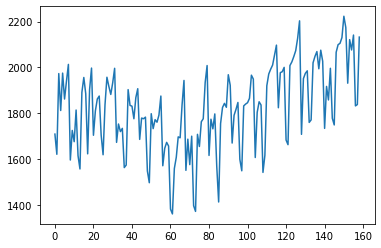

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

In [ ]:
#Splitting Data

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [4]:
Train

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,143,7.527256,20449,0,0,0,0,0,0,0,0,0,0,1,0
143,Dec-02,1996,144,7.598900,20736,0,0,0,0,0,0,0,0,0,0,0,1
144,Jan-03,1778,145,7.483244,21025,1,0,0,0,0,0,0,0,0,0,0,0
145,Feb-03,1749,146,7.466799,21316,0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
Test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Moving Average

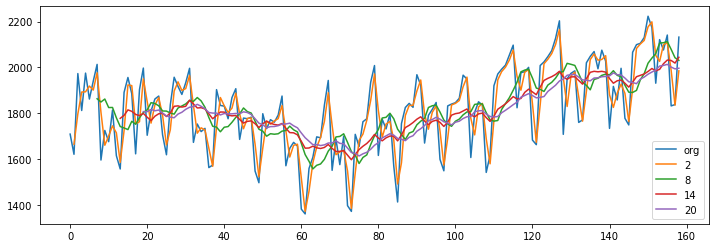

In [6]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<AxesSubplot:>

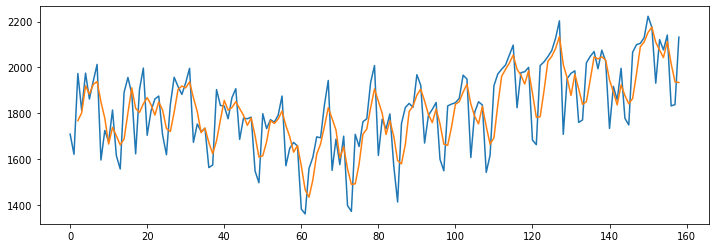

In [16]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
#for i in range(2,24,6):
Walmart["Footfalls"].rolling(3).mean().plot(label=str(3))


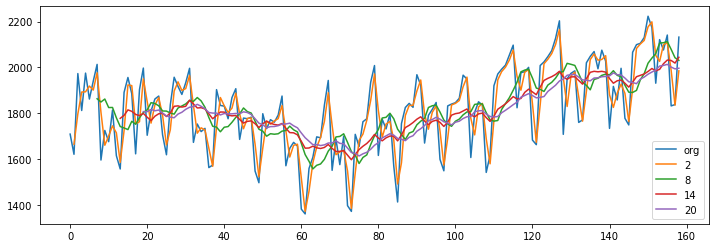

In [17]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [ ]:
#TimeSeries Decomposition Plot

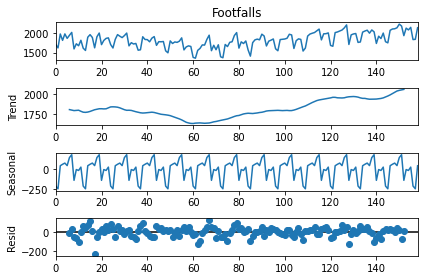

In [18]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

In [ ]:
#ACF and PACF PLots

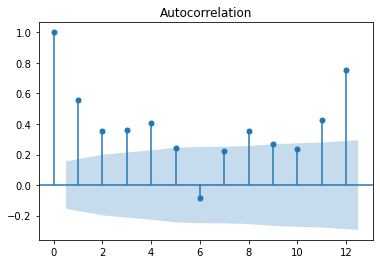

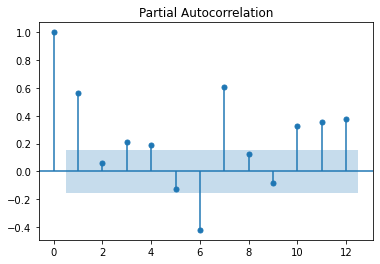

In [19]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


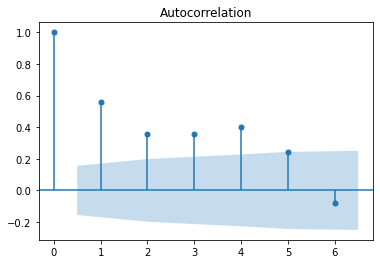

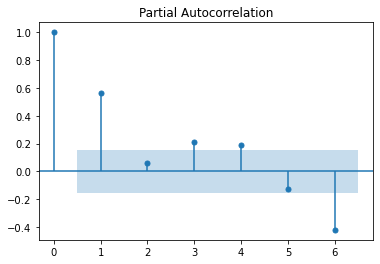

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=6)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=6)
plt.show()


In [ ]:
#Evaluation of Metric Ape

In [21]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
#Simple Exponential Method

In [22]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 

C:\Users\Sys\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.490637057828362

In [ ]:
#Holt Method

In [23]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

<ipython-input-23-9b7ea36ca4ed>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


7.546249229496066

In [ ]:
# Holt Winter Exponential Smoothing with Additive Seaonality and Additive Trend

In [24]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

3.7505010397295067

In [ ]:
# Holt Winter Exponential Smoothing with Multiplicative Seaonality and Additive Trend

In [25]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

3.939821065755419

In [ ]:
# Final Model by Combining Train and Test

In [26]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [27]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2159.049612
160    2184.181287
161    2175.047623
162    2259.531412
163    2274.782926
164    1973.579880
165    2149.808584
166    2125.710663
167    2174.849726
168    1909.325993
dtype: float64